# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename, header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [3]:
list(df.columns)

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'cal

In [4]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the NYC Airbnb listings dataset and I will be predicting the star rating of the listing using the label 'review_scores_rating'. This is a regression supervised learning problem because I have a known numerical label for each observation. Some features I am planning to use are 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'neighbourhood_group_cleansed', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', and 'number_of_reviews'. This is an important business problem because it can provide important insights into how different factors may contribute to customers' satisfaction with their short-term rental experiences. This information could be useful to both Airbnb hosts, and the Airbnb company because it can be applied to questions like which new properties to recommend to users.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# YOUR CODE HERE
df.shape

(28022, 50)

In [6]:
features = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'neighbourhood_group_cleansed', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'number_of_reviews',]
new_cols = features.append('review_scores_rating')
df_small = df[features]

First I'm going to look at how many missing values there are for each feature. I will find the features I may want to impute during the data cleaning.

In [7]:
nan_count = np.sum(df_small.isnull(), axis = 0)
nan_count

host_response_rate              11843
host_acceptance_rate            11113
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
accommodates                        0
bathrooms                           0
bedrooms                         2918
beds                             1354
neighbourhood_group_cleansed        0
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
number_of_reviews                   0
review_scores_rating                0
dtype: int64

In [8]:
nan_detected = nan_count != 0
is_int_or_float = df_small.dtypes.astype(str).isin(['int64', 'float64'])
to_impute = nan_detected & is_int_or_float
to_impute = list(df_small.columns[to_impute])
to_impute

['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']

Next I may to handle the 'neighbourhood_group_cleansed' and 'amenities' categorical features with One-Hot-Encoding.

In [9]:
len(df_small['neighbourhood_group_cleansed'].unique())

5

In [10]:
len(df_small['amenities'].unique())

25020

I am also going to look at the correlations between variables to help determine which features can be dropped and which may be good predictors.

In [11]:
correlation_matrix = df_small.drop(columns=['amenities', 'neighbourhood_group_cleansed']).corr()
correlation_matrix

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating
host_response_rate,1.000000,0.505700,NaN,0.041423,NaN,NaN,0.026465,0.023813,0.018564,0.024933,0.006480,-0.168258,-0.042353,0.037652,0.076863,0.121477
host_acceptance_rate,0.505700,1.000000,NaN,0.041191,NaN,NaN,0.062157,-0.003367,0.022499,0.039634,0.037550,-0.194484,-0.038418,0.055444,0.109003,0.012542
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,0.041423,0.041191,NaN,1.000000,NaN,NaN,-0.003904,0.013256,-0.004767,-0.015083,0.080995,0.023019,-0.000681,0.021678,-0.048170,-0.033200
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.026465,0.062157,NaN,-0.003904,NaN,NaN,1.000000,0.369444,0.744437,0.774654,0.519057,-0.061501,-0.006071,0.068515,0.064705,0.007798
bathrooms,0.023813,-0.003367,NaN,0.013256,NaN,NaN,0.369444,1.000000,0.477983,0.384581,0.331297,-0.012735,-0.002054,0.030792,-0.032664,-0.002080
bedrooms,0.018564,0.022499,NaN,-0.004767,NaN,NaN,0.744437,0.477983,1.000000,0.757191,0.475506,-0.030590,0.002150,0.053350,0.001403,0.011528
beds,0.024933,0.039634,NaN,-0.015083,NaN,NaN,0.774654,0.384581,0.757191,1.000000,0.409236,-0.050932,-0.003580,0.063360,0.067944,0.000233


Lastly, I may want to remove outliers, so I will look at the numerical variables and which have abnormally extreme values.

In [12]:
desc = df_small.describe()

desc.index = desc.index.map({
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': '25th Percentile',
    '50%': '50th Percentile (Median)',
    '75%': '75th Percentile',
    'max': 'Max'
})

desc

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
Count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,2.802200e+04,28022.000000,28022.000000
Mean,0.906901,0.791953,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,7.869541e+04,31.589965,4.683482
Std Dev,0.227282,0.276732,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,1.282973e+07,56.299006,0.505857
Min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,1.000000e+00,1.000000,0.000000
25th Percentile,0.940000,0.680000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,4.000000e+01,3.000000,4.600000
50th Percentile (Median),1.000000,0.910000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,1.124000e+03,9.000000,4.830000
75th Percentile,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,1.125000e+03,33.000000,5.000000
Max,1.000000,1.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,2.147484e+09,1009.000000,5.000000


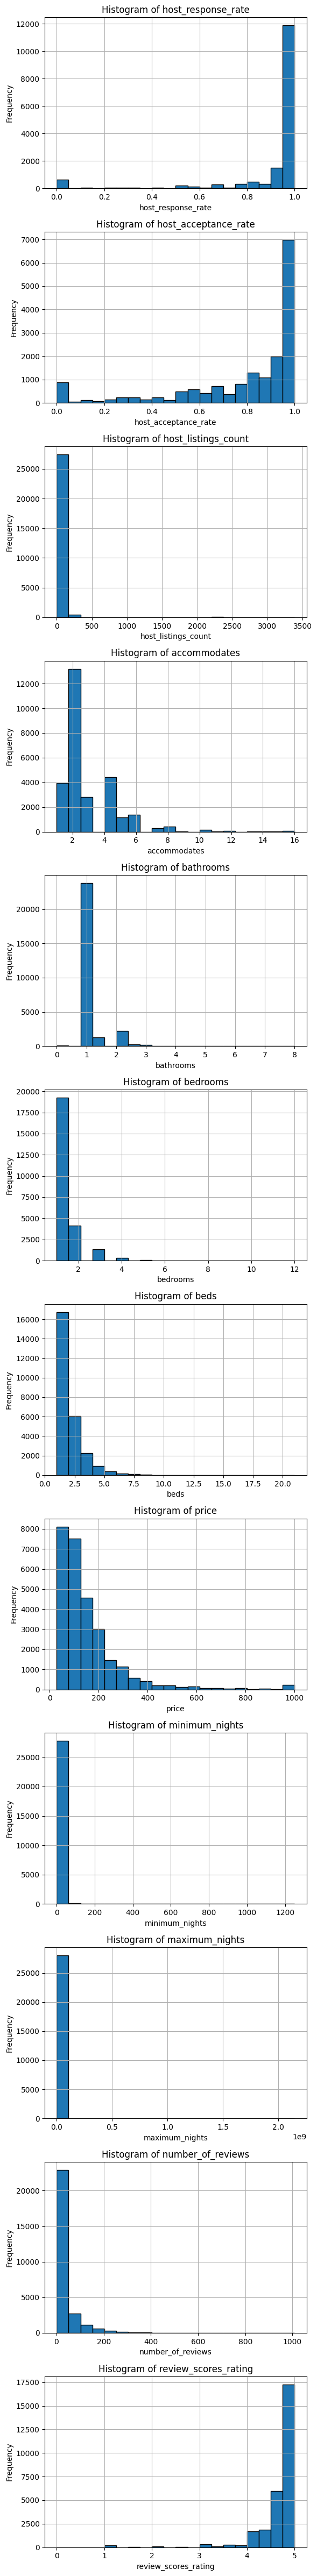

In [13]:
import matplotlib.pyplot as plt

numeric_cols = df_small.columns[is_int_or_float]
num_cols = len(numeric_cols)

fig, axes = plt.subplots(nrows=num_cols, figsize=(6, 4 * num_cols))

if num_cols == 1:
    axes = [axes]

for i, col in enumerate(numeric_cols):
    df_small[col].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

It looks like I might want to handle the most extreme outliers, in host_listings_count, minimum_nights, maximum_nights, and numer_of_reviews. Since these numeric values are also on very different frames of magitude, I will need to scale my data to use certain techniques.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data, I think I will keep most of the features I initially chose but there are a few I am dropping. Some I am removing are 'amenities' because it has 25,020 categories and may add too much dimensionality to the dataset with one-hot-encoding, and 'beds' because it is highly correlated with bedrooms and provides redundant information. Some data preparation techniques I plan to use are imputation (replacing the missing numerical values with the variable's mean), winsorization (to handle outliers), and one-hot-encoding (to let ML models use the categorical data). I am planning to use a linear regression model, Random Forest, and neural network in order to try out different levels of complexity and flexibility. For all models, I will use a train-test split to so that I can evaluate the model on how well it performs on unseen data, which avoids overfitting to the training data. I will train the linear regression model on the training subset of the data, and will evaluate it using MSE and R² to detect underfitting and linearity limitations. For the Random Forest, I will tune hyperparameters using grid search with cross-validation. I will also evaluate it with MSE from the test set. For the neural network, I will build a traditional neural net with 3 hidden layers and train it using gradient descent, validating performance with a held-out validation set. If overfitting occurs, I can use dropout or regularization, and if underfitting, I can increase the number of epochs. I will evaluate it using test test MSE and loss.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

**Step 1: Preparing the data**

In [15]:
# Feature Selection
df = df_small.drop(columns=['amenities', 'beds'])

In [16]:
# Imputation
to_impute.remove('beds')
for col in to_impute:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

for colname in to_impute:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0


In [17]:
# Winsorization
df['host_listings_count'] = stats.mstats.winsorize(df['host_listings_count'], limits=[0.01, 0.01])
df['minimum_nights'] = stats.mstats.winsorize(df['minimum_nights'], limits=[0.01, 0.01])
df['maximum_nights'] = stats.mstats.winsorize(df['maximum_nights'], limits=[0.01, 0.01])
df['number_of_reviews'] = stats.mstats.winsorize(df['number_of_reviews'], limits=[0.01, 0.01])

In [18]:
# One-Hot-Encoding
df_neighborhood = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed_')
df = df.join(df_neighborhood)
df.drop(columns = 'neighbourhood_group_cleansed', inplace=True)

In [19]:
# Scaling
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [20]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed__Bronx,neighbourhood_group_cleansed__Brooklyn,neighbourhood_group_cleansed__Manhattan,neighbourhood_group_cleansed__Queens,neighbourhood_group_cleansed__Staten Island
0,-6.190192e-01,-2.893351,True,-0.021702,True,True,-1.007673,-0.337606,0.000000,-0.030031,0.818900,0.964842,True,0.340536,0.032654,-0.175576,-0.819486,1.186421,-0.40824,-0.101186
1,-4.730337e+00,-0.474289,True,-0.273518,True,True,0.067470,-0.337606,-0.497128,-0.562648,-1.112560,0.193199,True,4.694519,-0.461566,-0.175576,1.220276,-0.842871,-0.40824,-0.101186
2,5.390984e-01,-2.521188,True,-0.273518,True,True,0.605041,0.849692,1.010653,0.857665,-0.846152,0.964842,True,-0.565722,0.625717,-0.175576,1.220276,-0.842871,-0.40824,-0.101186
3,5.390984e-01,0.967845,True,-0.273518,True,True,-0.470102,-0.337606,-0.497128,-0.612359,-1.045958,-1.205525,True,4.694519,-0.936017,-0.175576,-0.819486,1.186421,-0.40824,-0.101186
4,6.428845e-16,0.000000,True,-0.273518,True,True,-1.007673,-0.337606,-0.497128,-0.562648,-1.045958,-1.205525,True,1.719626,0.447798,-0.175576,-0.819486,1.186421,-0.40824,-0.101186


**Step 2: Training Models**

In [22]:
X = df.drop(columns=['review_scores_rating'], axis=1)
y = df['review_scores_rating']
print(X.shape)
print(y.shape)

(28022, 19)
(28022,)


In [23]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
# Linear Regression
model = LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

# Evaluation
test_mse = mean_squared_error(y_test, prediction)
test_r2 = r2_score(y_test, prediction)
print("Test MSE:", test_mse)
print("Test R²:", test_r2)

Test MSE: 1.0202774336579044
Test R²: 0.033803811920393945


This R² is very small and the MSE is large in the context of the data, indicating that the linear model is not performing well.

In [25]:
# Random Forest 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

rf = RandomForestRegressor(random_state=123)

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1 
)

rf_grid_search.fit(X, y)

rmse_RF = np.sqrt(-1 * rf_grid_search.best_score_)
rf_best_model = rf_grid_search.best_estimator_

print("[RF] RMSE for the best model is : {:.2f}".format(rmse_RF) )
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

[RF] RMSE for the best model is : 0.97
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}


We can see that the Random Forest performed better than the linear regression model, with an MSE of .97.

In [26]:
# Neural Net
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1],))
nn_model.add(input_layer)

hidden_layer_1 = hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='linear')
nn_model.add(output_layer)

nn_model.summary()

/Users/carolineklein/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.MeanSquaredError()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['mae'])

In [28]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            print(', '.join(s_list := [s] + logs_s))


In [29]:
t0 = time.time()

num_epochs = 100

history = nn_model.fit(
    X_train, y_train,
    epochs=num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
    validation_split=0.2
)

t1 = time.time()

print('Elapsed time: %.2fs' % (t1 - t0))

Epoch [5/ 100], Loss: 0.9108, Mae: 0.5781, Val_loss: 1.0566, Val_mae: 0.5934
Epoch [10/ 100], Loss: 0.8984, Mae: 0.5755, Val_loss: 1.0512, Val_mae: 0.6276
Epoch [15/ 100], Loss: 0.8897, Mae: 0.5736, Val_loss: 1.0516, Val_mae: 0.6170
Epoch [20/ 100], Loss: 0.8844, Mae: 0.5716, Val_loss: 1.0346, Val_mae: 0.5770
Epoch [25/ 100], Loss: 0.8771, Mae: 0.5704, Val_loss: 1.0989, Val_mae: 0.6072
Epoch [30/ 100], Loss: 0.8688, Mae: 0.5677, Val_loss: 1.0375, Val_mae: 0.5825
Epoch [35/ 100], Loss: 0.8638, Mae: 0.5676, Val_loss: 1.0570, Val_mae: 0.6034
Epoch [40/ 100], Loss: 0.8497, Mae: 0.5632, Val_loss: 1.0335, Val_mae: 0.5809
Epoch [45/ 100], Loss: 0.8437, Mae: 0.5616, Val_loss: 1.0582, Val_mae: 0.5640
Epoch [50/ 100], Loss: 0.8408, Mae: 0.5608, Val_loss: 1.0702, Val_mae: 0.5757
Epoch [55/ 100], Loss: 0.8423, Mae: 0.5607, Val_loss: 1.1129, Val_mae: 0.6459
Epoch [60/ 100], Loss: 0.8449, Mae: 0.5621, Val_loss: 1.0382, Val_mae: 0.5773
Epoch [65/ 100], Loss: 0.8341, Mae: 0.5594, Val_loss: 1.0429, Val

In [30]:
loss, mae = nn_model.evaluate(X_test, y_test)
print('Test MSE: {:.4f}, Test MAE: {:.4f}'.format(loss, mae))

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 1.0687 - mae: 0.5771
Test MSE: 1.0687, Test MAE: 0.5771


The neural network performed the poorest out of all three models, with an MSE of 1.034, indicating that it did not generalize well to unseen data.

**Part 3: Model Optimization**

Since the RandomForest performed the best with the lowest MSE, I will work on further optimizing this model.

In [31]:
# Random Forest 
param_grid = {
    'n_estimators': [100, 150, 200, 300], 
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['sqrt', 0.5, 0.75],
}

rf = RandomForestRegressor(random_state=123)

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1 
)

rf_grid_search.fit(X, y)

rmse_RF = np.sqrt(-1 * rf_grid_search.best_score_)
rf_best_model = rf_grid_search.best_estimator_

print("[RF] RMSE for the best model is : {:.2f}".format(rmse_RF) )
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
importances = rf_best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]


/Users/carolineklein/miniconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[RF] RMSE for the best model is : 0.96
Best parameters for Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


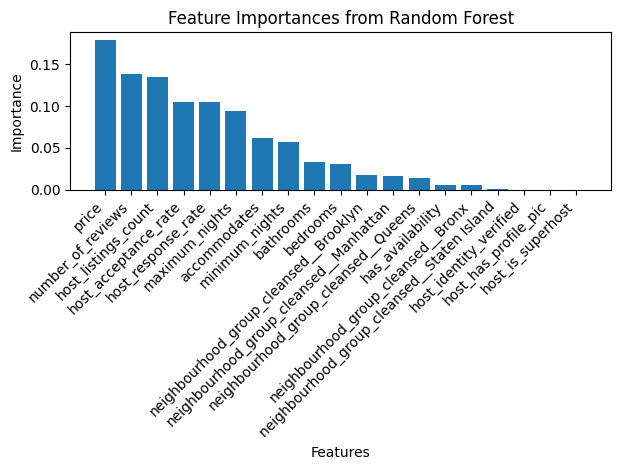

In [32]:
plt.figure()
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

After running the grid-search cross-validation with more parameters, we can observe a slight improvement in performance, as the test MSE dropped from 0.97 in the last model to 0.96. The optimal Random Forest model has the parameters max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, and n_estimators=300. Additionally, with the RandomForest model, we can gain insights into how much each feature contributes to the model's predictive accuracy of the Airbnb rating. From the chart, we can see that price, number_of_reviews, and host_listings_count are some of the most important features. These findings can offer actionable insights to Airbnb and rental hosts.